In [8]:
import keras
import tensorflow as tf
from keras.layers import Input, Dense, Activation
from keras.models import Model, Sequential
import numpy as np

## Data
We use the MNIST dataset which comes with Keras.

In [3]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(
    X_train.shape, #=> (600000, 28, 28)
    y_train.shape, #=> (600000, 1)
)

(60000, 28, 28) (60000,)


![8EA18397-309B-4F48-AA18-E462DA2F4CA9.png](8EA18397-309B-4F48-AA18-E462DA2F4CA9.png)

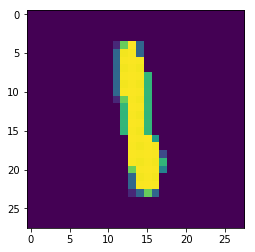

In [5]:
from matplotlib import pyplot as plt
plt.imshow(X_train[200])

## Basic model setup

In [6]:
X_train = X_train.reshape([60000, 784])
X_test = X_test.reshape([10000, 784])

The images are in an array structure of the following shape `(28, 28)`.  Yet the input layer for a simple FCNN is only 1-dimensional. Therefore the need to reshape it to `(784, )`

In [9]:
model = Sequential()
model.add(Dense(500, input_shape=(784,)))
model.add(Activation('softmax'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


We need to add the activation layers explicitly. Otherwise linear activation is used and the model doesn't really train.

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

Very very standard settings. `sgd` is "Stochastic Gradient Descent".

## Training

In [14]:
Y_train = keras.utils.to_categorical(y_train, num_classes=10)
Y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [21]:
history = model.fit(X_train[0:6000], Y_train[0:6000], 
          epochs=10, verbose=1,
         validation_data=(X_test.reshape([10000, 784]), Y_test) )

Train on 6000 samples, validate on 10000 samples
Epoch 1/10
6000/6000 [==============================] - 2s 267us/step - loss: 1.2778 - acc: 0.5277 - val_loss: 1.3173 - val_acc: 0.5167
Epoch 2/10
6000/6000 [==============================] - 2s 275us/step - loss: 1.2563 - acc: 0.5327 - val_loss: 1.3031 - val_acc: 0.5203
Epoch 3/10
6000/6000 [==============================] - 2s 295us/step - loss: 1.2403 - acc: 0.5380 - val_loss: 1.2874 - val_acc: 0.5242
Epoch 4/10
6000/6000 [==============================] - 2s 376us/step - loss: 1.2228 - acc: 0.5412 - val_loss: 1.2913 - val_acc: 0.5148
Epoch 5/10
6000/6000 [==============================] - 2s 329us/step - loss: 1.1925 - acc: 0.5468 - val_loss: 1.2530 - val_acc: 0.5230
Epoch 6/10
6000/6000 [==============================] - 2s 345us/step - loss: 1.1840 - acc: 0.5495 - val_loss: 1.2326 - val_acc: 0.5328
Epoch 7/10
6000/6000 [==============================] - 2s 277us/step - loss: 1.1673 - acc: 0.5605 - val_loss: 1.2062 - val_acc: 0.5547

At this stage, more epochs of training will usually produce better results. The graph below will nicely show when we start to overfit the training data.

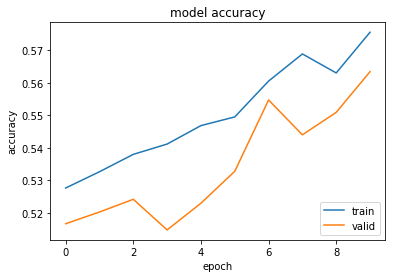

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()

## Prediction

In [19]:
model.predict_classes(X_test)[100] #=> 6

6

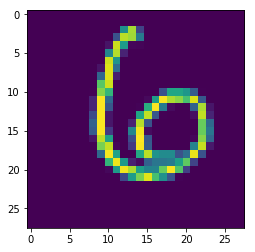

In [18]:
plt.imshow(X_test[100].reshape([28, 28]))